In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sympy as sym

$$y\prime = x^2 + y^2$$

In [6]:
x_0 = 1
y_0 = 1

params = {
    "dx": 1e-3,
    "n": 500
}


## Polynomial approximation

In [47]:
def poly(x):
    return 1 + 2*(x-1) + 4*(x-1)**2 + 25/3*(x-1)**3 + 81/4*(x-1)**4

x_1 = x_0 + params["n"] * params["dx"]
XY_poly_approx = np.vectorize(poly)(np.arange(x_0, x_1, params["dx"]))


## RK4

In [30]:
def f(x, y):
    return x**2 + y**2

In [31]:
def RungeKuttas4(f, x0: float, y0: float, n: int = 1000, dx: float = 1e-2):
    points = np.zeros((n, 2))
    points[0] = [x0, y0]
    for i in range(1, n):
        x, y = points[i-1]
        k1 = f(x, y)
        k2 = f(x + dx/2, y + k1*dx/2)
        k3 = f(x + dx/2, y + k2*dx/2)
        k4 = f(x + dx, y + k3*dx)
        points[i] = (
            x + dx,
            y + dx * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        )
    return points

## SymPy

In [25]:
from sympy import dsolve, Function, Symbol

x = Symbol('x')
y = Function('y')(x)
yp = sym.diff(y, x)

eq = sym.Eq(yp, x**2 + y**2)

res = dsolve(eq, y, ics={
    y.subs(x, x_0): y_0
})
print(res)



TypeError: bad operand type for unary -: 'list'

## Plot

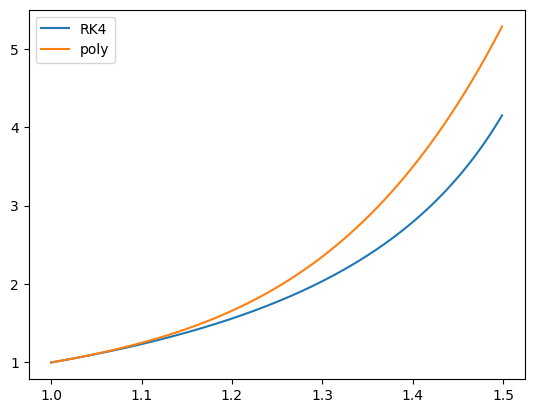

In [49]:
XY = RungeKuttas4(f, x_0, y_0, n=500, dx=1e-3)
plt.plot(XY[:, 0], XY[:, 1], label="RK4")
plt.plot(XY[:, 0], XY_poly_approx, label="poly")
plt.legend()
plt.show()